# Chapter 1a: Data Science Data and Data Sets

This notebook focuses on the foundation of data science: understanding, analyzing, and preparing data for machine learning algorithms. We'll explore various dataset types, data collection methods, preprocessing techniques, and best practices for ensuring data quality.

In [2]:
!pip install -q missingno


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
import missingno as msno

# Configure visualizations
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\aashu\AppData\Local\Temp\ipykernel_29868\1870427038.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Types of Data in Data Science

In data science, we encounter various types of data:

### 1.1 Based on Structure

- **Structured Data**: Organized in a tabular format with rows and columns (e.g., CSV files, relational databases)
- **Unstructured Data**: No predefined format or organization (e.g., text, images, audio, video)
- **Semi-structured Data**: Has some organizational properties but doesn't conform to a rigid structure (e.g., JSON, XML)

### 1.2 Based on Variable Type

- **Numerical Data**:
  - **Continuous**: Can take any value within a range (e.g., height, weight, temperature)
  - **Discrete**: Takes only certain values, usually integers (e.g., count of items, number of children)
  
- **Categorical Data**:
  - **Nominal**: Categories with no intrinsic order (e.g., colors, gender, country)
  - **Ordinal**: Categories with a meaningful order (e.g., education level, satisfaction rating)
  
- **Time Series Data**: Sequences of data points indexed in time order
- **Text Data**: Written or printed words
- **Binary Data**: Data with only two possible values (0/1, Yes/No, True/False)

Understanding the type of data is crucial for selecting appropriate preprocessing techniques and machine learning algorithms.

## 2. Data Collection and Sources

Data can be collected through various methods:

1. **Primary Collection**: Directly collected data (surveys, experiments, observations)
2. **Secondary Sources**: Pre-existing datasets (public datasets, commercial databases)
3. **Web Scraping**: Extracting data from websites
4. **APIs**: Accessing data from online services and platforms
5. **IoT Devices**: Collecting data from sensors and connected devices
6. **Logs and Transactions**: System logs, user interactions, purchase records

For this notebook, we'll focus on exploring and working with established datasets available through scikit-learn and other public sources.

## 3. Exploring Datasets

Let's explore several popular datasets that we'll use throughout our machine learning notebooks.

In [4]:
# Create a function to display dataset information
def describe_dataset(name, X, y=None, target_names=None, feature_names=None):
    print(f"\n{'='*40}")
    print(f"{name} Dataset")
    print(f"{'='*40}")
    
    # Features information
    print(f"Number of samples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}")
    
    if feature_names is not None and len(feature_names) > 0:
        print(f"Features: {', '.join(feature_names[:5])}... (and {len(feature_names)-5} more)")
    
    # Target information if provided
    if y is not None:
        if len(y.shape) > 1:
            print(f"Target shape: {y.shape}")
        else:
            if np.issubdtype(y.dtype, np.number):
                # For regression tasks
                print(f"Target min: {y.min()}, max: {y.max()}, mean: {y.mean():.2f}, std: {y.std():.2f}")
            else:
                # For classification tasks
                unique_values = np.unique(y)
                print(f"Target unique values: {unique_values}")
                print(f"Target distribution: {np.bincount(y if y.dtype == int else y.astype(int))}")
                
        if target_names is not None:
            print(f"Target names: {target_names}")

### 3.1 Classification Datasets

In [5]:
# Iris Dataset - Multi-class classification
iris = datasets.load_iris()
describe_dataset("Iris", iris.data, iris.target, iris.target_names, iris.feature_names)

# Create a DataFrame for easier visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
iris_df.head()


Iris Dataset
Number of samples: 150
Number of features: 4
Features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)... (and -1 more)
Target min: 0, max: 2, mean: 1.00, std: 0.82
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# Breast Cancer Wisconsin Dataset - Binary classification
cancer = datasets.load_breast_cancer()
describe_dataset("Breast Cancer Wisconsin", cancer.data, cancer.target, cancer.target_names, cancer.feature_names)

# Create a DataFrame
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df['diagnosis'] = cancer_df['target'].map({0: 'malignant', 1: 'benign'})

# Display first few rows
cancer_df.head()


Breast Cancer Wisconsin Dataset
Number of samples: 569
Number of features: 30
Features: mean radius, mean texture, mean perimeter, mean area, mean smoothness... (and 25 more)
Target min: 0, max: 1, mean: 0.63, std: 0.48
Target names: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [7]:
# Wine Dataset - Multi-class classification
wine = datasets.load_wine()
describe_dataset("Wine", wine.data, wine.target, wine.target_names, wine.feature_names)

# Create a DataFrame
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Display first few rows
wine_df.head()


Wine Dataset
Number of samples: 178
Number of features: 13
Features: alcohol, malic_acid, ash, alcalinity_of_ash, magnesium... (and 8 more)
Target min: 0, max: 2, mean: 0.94, std: 0.77
Target names: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 3.2 Regression Datasets

In [8]:
# Boston Housing Dataset - Regression
try:
    boston = datasets.load_boston()
    describe_dataset("Boston Housing", boston.data, boston.target, feature_names=boston.feature_names)
    
    # Create a DataFrame
    boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
    boston_df['target'] = boston.target
    
    # Display first few rows
    boston_df.head()
except:
    print("Boston Housing dataset is no longer available in scikit-learn. Using California Housing instead.")
    
    # California Housing Dataset - Alternative to Boston
    california = datasets.fetch_california_housing()
    describe_dataset("California Housing", california.data, california.target, feature_names=california.feature_names)
    
    # Create a DataFrame
    california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
    california_df['target'] = california.target
    
    # Display first few rows
    california_df.head()

Boston Housing dataset is no longer available in scikit-learn. Using California Housing instead.

California Housing Dataset
Number of samples: 20640
Number of features: 8
Features: MedInc, HouseAge, AveRooms, AveBedrms, Population... (and 3 more)
Target min: 0.14999, max: 5.00001, mean: 2.07, std: 1.15


In [9]:
# Diabetes Dataset - Regression
diabetes = datasets.load_diabetes()
describe_dataset("Diabetes", diabetes.data, diabetes.target, feature_names=diabetes.feature_names)

# Create a DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

# Display first few rows
diabetes_df.head()


Diabetes Dataset
Number of samples: 442
Number of features: 10
Features: age, sex, bmi, bp, s1... (and 5 more)
Target min: 25.0, max: 346.0, mean: 152.13, std: 77.01


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 4. Data Preprocessing Techniques

Data preprocessing is a crucial step in the machine learning pipeline. It involves transforming raw data into a format suitable for modeling. Let's explore various preprocessing techniques.

### 4.1 Handling Missing Values

Missing values are common in real-world datasets and need to be addressed before modeling.

In [10]:
# Create a sample dataset with missing values
np.random.seed(42)
sample_data = pd.DataFrame({
    'age': np.random.randint(18, 90, 100),
    'income': np.random.randn(100) * 20000 + 50000,
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100)
})

# Introduce missing values
for col in sample_data.columns:
    mask = np.random.choice([True, False], sample_data.shape[0], p=[0.1, 0.9])
    sample_data.loc[mask, col] = np.nan
    
# Display the first few rows
print("Sample data with missing values:")
sample_data.head(10)

Sample data with missing values:


,age,income,education,region
0,NaN,66695.908385,Bachelor,South
1,NaN,55931.227687,Master,East
2,89.0,29243.402470,PhD,NaN
3,78.0,48483.925099,NaN,East
4,38.0,69459.270675,NaN,East
5,41.0,65911.909278,PhD,NaN
6,20.0,79908.685058,High School,South
7,39.0,56763.625040,PhD,South
8,70.0,117445.925073,High School,North
9,19.0,31592.183899,Bachelor,West


In [11]:
# Check missing values
missing_values = sample_data.isnull().sum()
missing_percentage = (missing_values / len(sample_data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print("Missing values summary:")
missing_df

Missing values summary:


,Missing Values,Percentage (%)
age,16,16.0
income,14,14.0
education,9,9.0
region,8,8.0


<Figure size 1000x600 with 0 Axes>

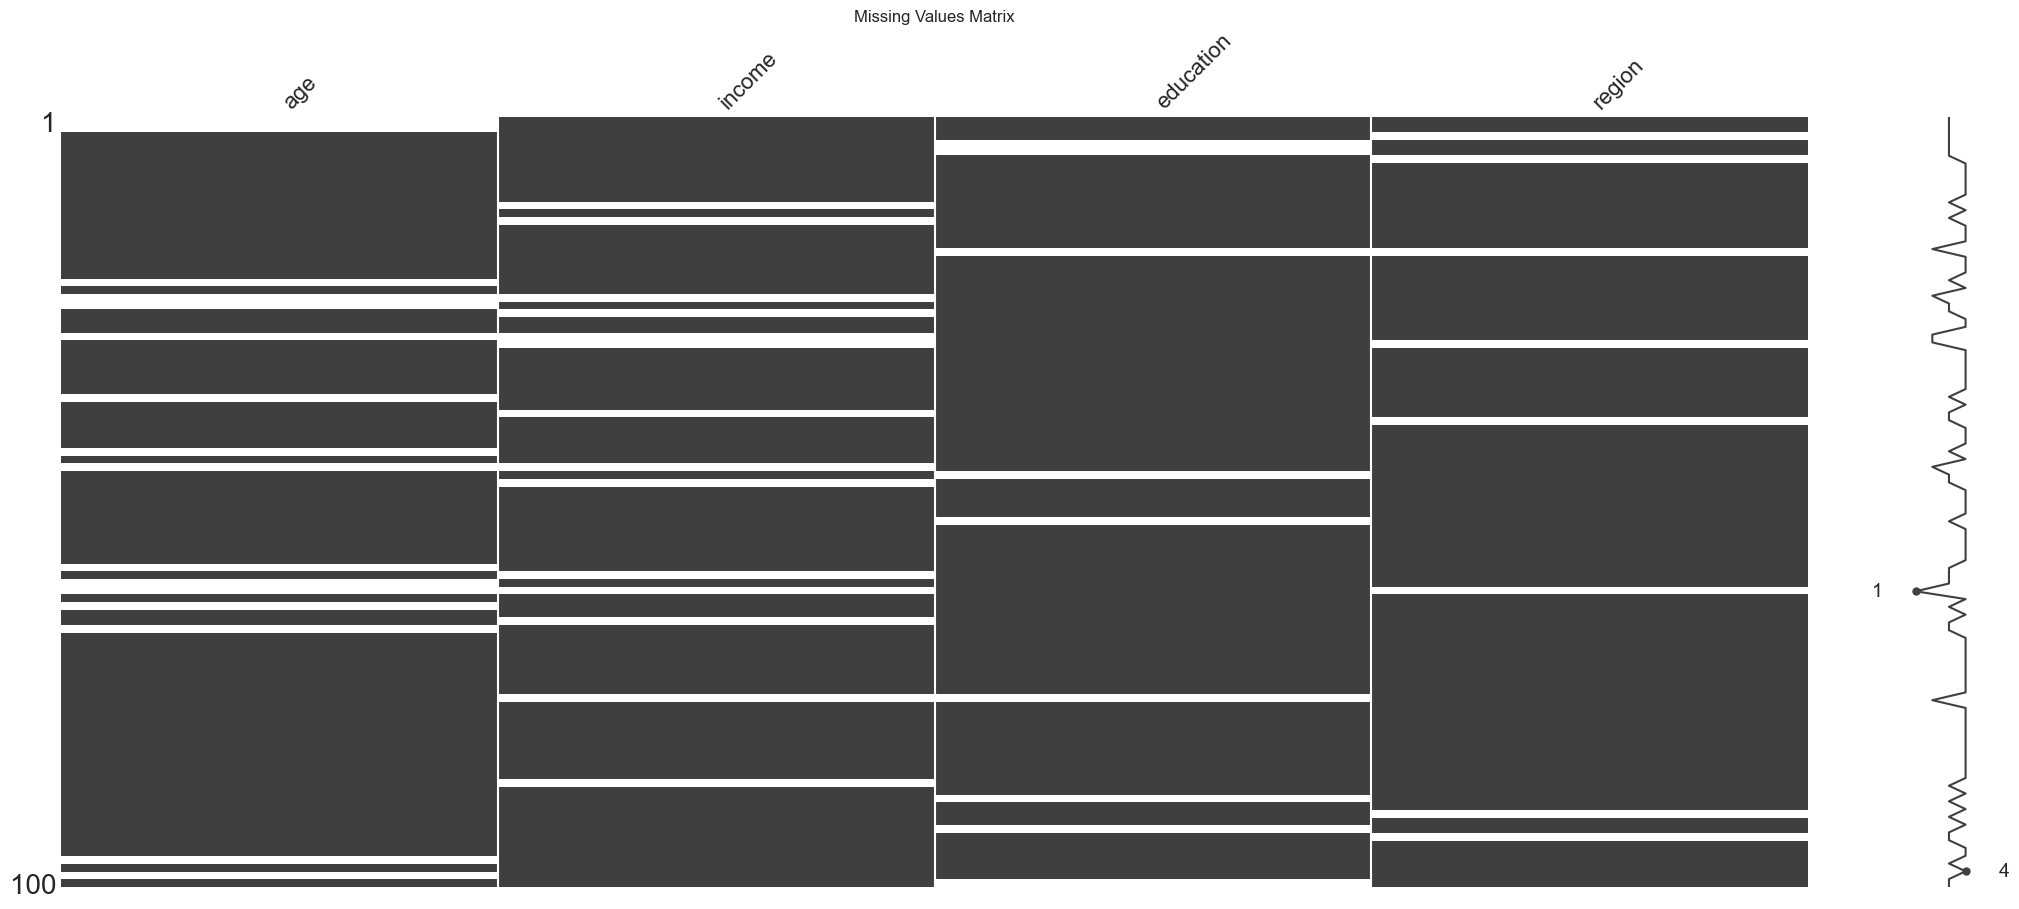

<Figure size 1000x600 with 0 Axes>

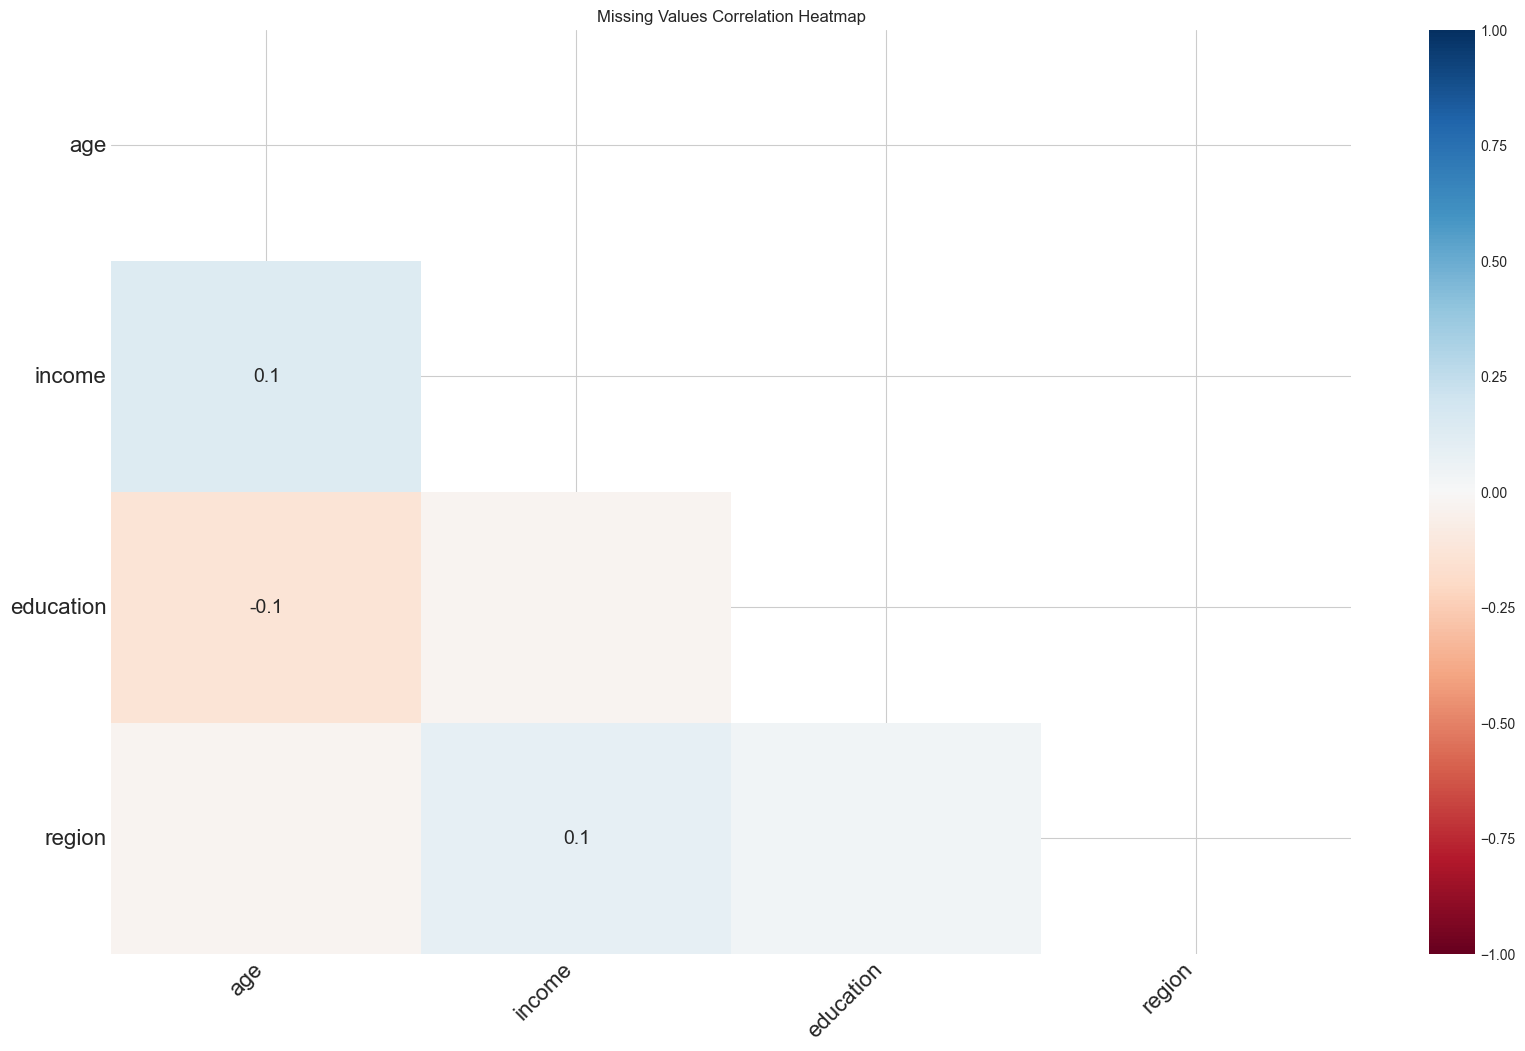

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(sample_data)
plt.title('Missing Values Matrix')
plt.show()

plt.figure(figsize=(10, 6))
msno.heatmap(sample_data)
plt.title('Missing Values Correlation Heatmap')
plt.show()

#### Techniques for Handling Missing Values:

In [13]:
# 1. Removing rows with missing values
data_dropna = sample_data.dropna()
print(f"Original shape: {sample_data.shape}")
print(f"Shape after dropping NA rows: {data_dropna.shape}")

Original shape: (100, 4)
Shape after dropping NA rows: (61, 4)


In [14]:
# 2. Simple imputation for numerical features
numerical_cols = ['age', 'income']

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
data_mean_imputed = sample_data.copy()
data_mean_imputed[numerical_cols] = mean_imputer.fit_transform(sample_data[numerical_cols])

# Median imputation
median_imputer = SimpleImputer(strategy='median')
data_median_imputed = sample_data.copy()
data_median_imputed[numerical_cols] = median_imputer.fit_transform(sample_data[numerical_cols])

# Compare original with imputed data for a few samples
comparison = pd.DataFrame({
    'Original Age': sample_data['age'],
    'Mean Imputed Age': data_mean_imputed['age'],
    'Median Imputed Age': data_median_imputed['age'],
    'Original Income': sample_data['income'],
    'Mean Imputed Income': data_mean_imputed['income'],
    'Median Imputed Income': data_median_imputed['income']
})

# Show only rows that had missing values
comparison.loc[sample_data['age'].isnull() | sample_data['income'].isnull()].head(10)

,Original Age,Mean Imputed Age,Median Imputed Age,Original Income,Mean Imputed Income,Median Imputed Income
0,NaN,52.047619,52.0,66695.908385,66695.908385,66695.908385
1,NaN,52.047619,52.0,55931.227687,55931.227687,55931.227687
11,55.0,55.000000,55.0,NaN,51677.032165,50130.816502
13,81.0,81.000000,81.0,NaN,51677.032165,50130.816502
21,NaN,52.047619,52.0,41462.624119,41462.624119,41462.624119
23,NaN,52.047619,52.0,NaN,51677.032165,50130.816502
24,NaN,52.047619,52.0,55142.337401,55142.337401,55142.337401
25,79.0,79.000000,79.0,NaN,51677.032165,50130.816502
28,NaN,52.047619,52.0,NaN,51677.032165,50130.816502
29,72.0,72.000000,72.0,NaN,51677.032165,50130.816502


In [15]:
# 3. Simple imputation for categorical features
categorical_cols = ['education', 'region']

# Most frequent value imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode_imputed = sample_data.copy()
data_mode_imputed[categorical_cols] = mode_imputer.fit_transform(sample_data[categorical_cols])

# Compare original with imputed data for a few samples
comparison = pd.DataFrame({
    'Original Education': sample_data['education'],
    'Mode Imputed Education': data_mode_imputed['education'],
    'Original Region': sample_data['region'],
    'Mode Imputed Region': data_mode_imputed['region']
})

# Show only rows that had missing values
comparison.loc[sample_data['education'].isnull() | sample_data['region'].isnull()].head(10)

,Original Education,Mode Imputed Education,Original Region,Mode Imputed Region
2,PhD,PhD,NaN,South
3,NaN,PhD,East,East
4,NaN,PhD,East,East
5,PhD,PhD,NaN,South
17,NaN,PhD,NaN,South
29,Bachelor,Bachelor,NaN,South
39,High School,High School,NaN,South
46,NaN,PhD,East,East
52,NaN,PhD,East,East
61,Bachelor,Bachelor,NaN,South


In [16]:
# 4. KNN imputation
# First, we need to encode categorical features for KNN imputation
data_for_knn = sample_data.copy()

# One-hot encode categorical variables
data_for_knn = pd.get_dummies(data_for_knn, columns=categorical_cols, dummy_na=False)

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(
    knn_imputer.fit_transform(data_for_knn),
    columns=data_for_knn.columns
)

# Display the first few rows after KNN imputation
data_knn_imputed.head()

,age,income,education_Bachelor,education_High School,education_Master,education_PhD,region_East,region_North,region_South,region_West
0,74.0,66695.908385,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,67.4,55931.227687,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,89.0,29243.402470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,78.0,48483.925099,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,38.0,69459.270675,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.2 Handling Outliers

Outliers are extreme values that deviate significantly from other observations. They can affect model performance and need to be addressed.

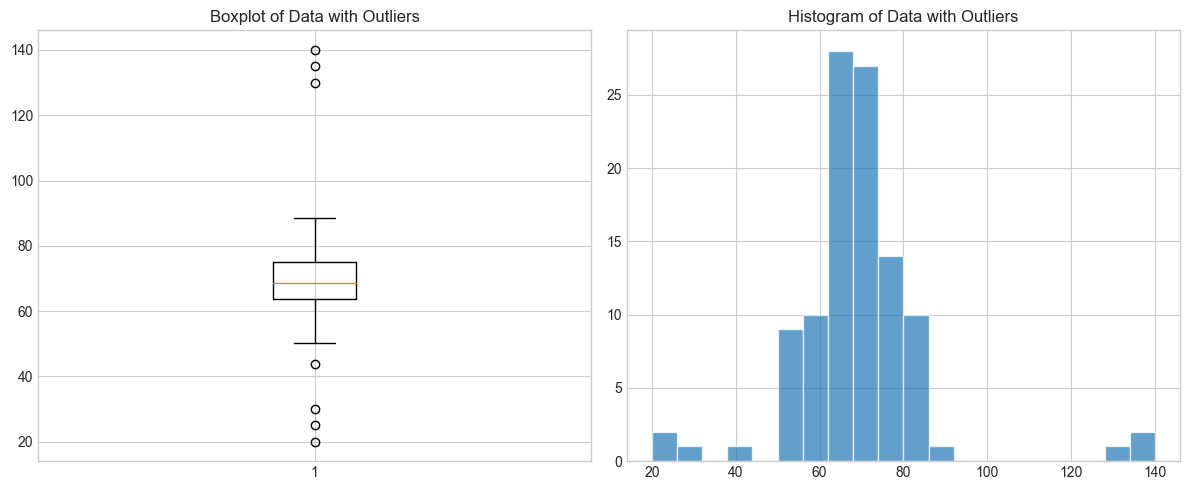

In [17]:
# Create a dataset with outliers
np.random.seed(42)
normal_data = np.random.randn(100) * 10 + 70  # normal distribution with mean 70 and std 10
outliers = np.array([20, 25, 30, 130, 135, 140])  # outliers
data_with_outliers = np.concatenate([normal_data, outliers])

# Visualize the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data_with_outliers)
plt.title('Boxplot of Data with Outliers')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(data_with_outliers, bins=20, alpha=0.7)
plt.title('Histogram of Data with Outliers')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Techniques for Detecting Outliers:

In [18]:
# 1. Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]

outliers_zscore = detect_outliers_zscore(data_with_outliers)
print(f"Detected outliers (Z-score method): {outliers_zscore}")
print(f"Outlier values: {data_with_outliers[outliers_zscore]}")

Detected outliers (Z-score method): [100 103 104 105]
Outlier values: [ 20. 130. 135. 140.]


In [19]:
# 2. IQR method
def detect_outliers_iqr(data, k=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return np.where((data < lower_bound) | (data > upper_bound))[0]

outliers_iqr = detect_outliers_iqr(data_with_outliers)
print(f"Detected outliers (IQR method): {outliers_iqr}")
print(f"Outlier values: {data_with_outliers[outliers_iqr]}")

Detected outliers (IQR method): [ 74 100 101 102 103 104 105]
Outlier values: [ 43.80254896  20.          25.          30.         130.
 135.         140.        ]


#### Techniques for Handling Outliers:

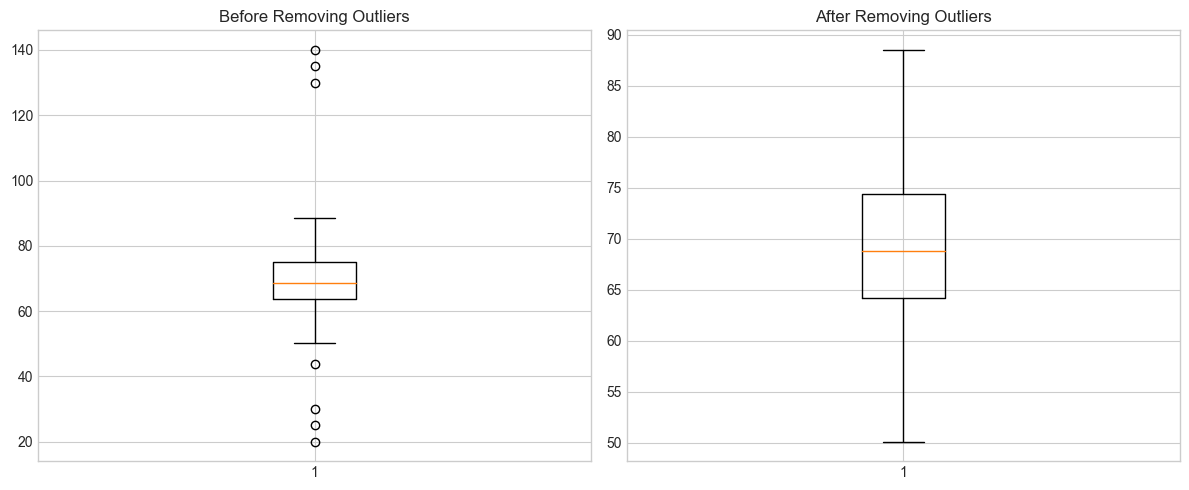

Original data mean: 69.59, std: 15.99
Data without outliers mean: 69.22, std: 8.72


In [20]:
# 1. Removing outliers
data_no_outliers = np.delete(data_with_outliers, outliers_iqr)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data_with_outliers)
plt.title('Before Removing Outliers')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot(data_no_outliers)
plt.title('After Removing Outliers')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Original data mean: {data_with_outliers.mean():.2f}, std: {data_with_outliers.std():.2f}")
print(f"Data without outliers mean: {data_no_outliers.mean():.2f}, std: {data_no_outliers.std():.2f}")

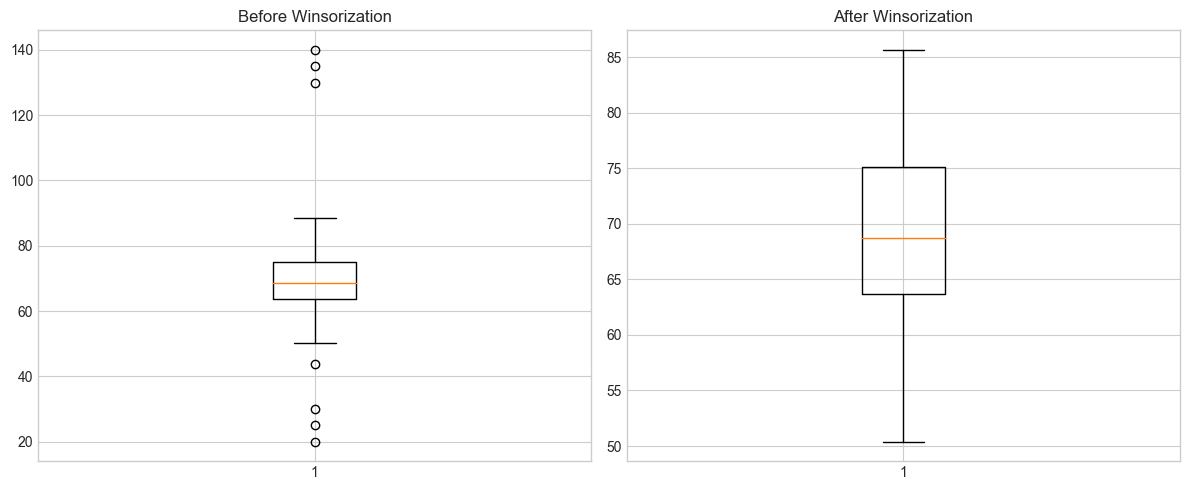

Original data mean: 69.59, std: 15.99
Winsorized data mean: 68.94, std: 9.53


In [21]:
# 2. Capping (Winsorization)
def winsorize_data(data, limits=(0.05, 0.05)):
    return stats.mstats.winsorize(data, limits=limits)

data_winsorized = winsorize_data(data_with_outliers)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data_with_outliers)
plt.title('Before Winsorization')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot(data_winsorized)
plt.title('After Winsorization')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Original data mean: {data_with_outliers.mean():.2f}, std: {data_with_outliers.std():.2f}")
print(f"Winsorized data mean: {data_winsorized.mean():.2f}, std: {data_winsorized.std():.2f}")

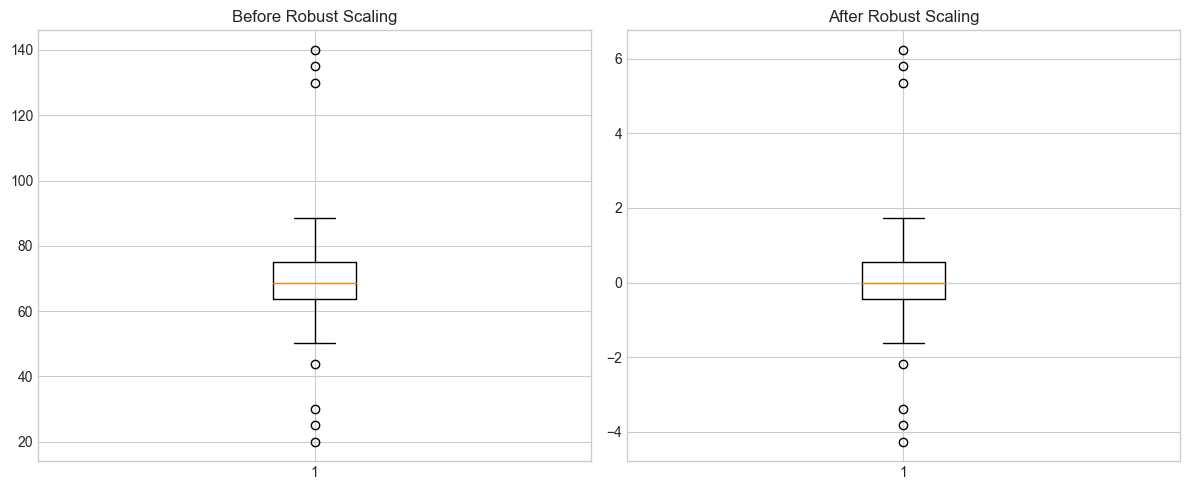

In [22]:
# 3. Robust scaling (less sensitive to outliers)
def robust_scale(data):
    scaler = RobustScaler()
    return scaler.fit_transform(data.reshape(-1, 1)).flatten()

data_robust_scaled = robust_scale(data_with_outliers)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data_with_outliers)
plt.title('Before Robust Scaling')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.boxplot(data_robust_scaled)
plt.title('After Robust Scaling')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4.3 Feature Scaling and Normalization

Feature scaling is crucial for many machine learning algorithms that are sensitive to the scale of input features.

In [23]:
# Create a dataset with features on different scales
np.random.seed(42)
n_samples = 1000

data_unscaled = pd.DataFrame({
    'feature1': np.random.normal(0, 1, n_samples),         # mean 0, std 1
    'feature2': np.random.normal(1000, 100, n_samples),    # mean 1000, std 100
    'feature3': np.random.normal(0, 0.1, n_samples)        # mean 0, std 0.1
})

# Display summary statistics
print("Unscaled data statistics:")
data_unscaled.describe()

Unscaled data statistics:


,feature1,feature2,feature3
count,1000.000000,1000.000000,1000.000000
mean,0.019332,1007.083624,0.000583
std,0.979216,99.745438,0.098345
min,-3.241267,705.961137,-0.301951
25%,-0.647590,939.375831,-0.064800
50%,0.025301,1006.307713,-0.000025
75%,0.647944,1072.888218,0.066092
max,3.852731,1319.310757,0.392624


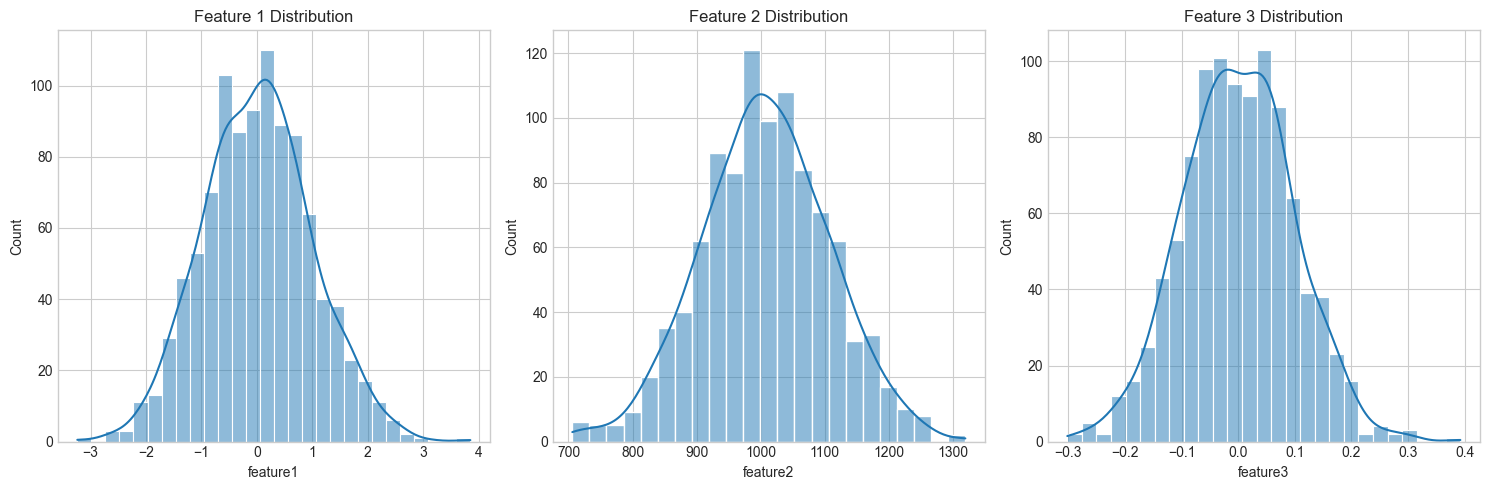

In [24]:
# Visualize the distribution of unscaled features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data_unscaled['feature1'], kde=True)
plt.title('Feature 1 Distribution')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.histplot(data_unscaled['feature2'], kde=True)
plt.title('Feature 2 Distribution')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.histplot(data_unscaled['feature3'], kde=True)
plt.title('Feature 3 Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Scaling Techniques:

In [25]:
# 1. Standard Scaling (Z-score normalization)
# Transforms features to have mean 0 and std 1
std_scaler = StandardScaler()
data_std_scaled = pd.DataFrame(
    std_scaler.fit_transform(data_unscaled),
    columns=data_unscaled.columns
)

print("Standardized data statistics:")
data_std_scaled.describe()

Standardized data statistics:


,feature1,feature2,feature3
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.217249e-18,1.030287e-16,-2.309264e-17
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.331472e+00,-3.020420e+00,-3.077784e+00
25%,-6.814187e-01,-6.791456e-01,-6.651667e-01
50%,6.098290e-03,-7.782799e-03,-6.190450e-03
75%,6.422755e-01,6.600555e-01,6.664355e-01
max,3.916723e+00,3.131806e+00,3.988355e+00


In [26]:
# 2. Min-Max Scaling
# Scales features to a fixed range, usually [0, 1]
minmax_scaler = MinMaxScaler()
data_minmax_scaled = pd.DataFrame(
    minmax_scaler.fit_transform(data_unscaled),
    columns=data_unscaled.columns
)

print("Min-Max scaled data statistics:")
data_minmax_scaled.describe()

Min-Max scaled data statistics:


,feature1,feature2,feature3
count,1000.000000,1000.000000,1000.000000
mean,0.459628,0.490948,0.435568
std,0.138034,0.162624,0.141591
min,0.000000,0.000000,0.000000
25%,0.365616,0.380557,0.341434
50%,0.460469,0.489683,0.434692
75%,0.548240,0.598235,0.529882
max,1.000000,1.000000,1.000000


In [27]:
# 3. Robust Scaling
# Uses median and interquartile range instead of mean and std, less sensitive to outliers
robust_scaler = RobustScaler()
data_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(data_unscaled),
    columns=data_unscaled.columns
)

print("Robust scaled data statistics:")
data_robust_scaled.describe()

Robust scaled data statistics:


,feature1,feature2,feature3
count,1.000000e+03,1000.000000,1.000000e+03
mean,-4.607023e-03,0.005812,4.648873e-03
std,7.558395e-01,0.747088,7.513508e-01
min,-2.521406e+00,-2.249578,-2.306690e+00
25%,-5.193926e-01,-0.501316,-4.948747e-01
50%,1.301043e-18,0.000000,-5.421011e-20
75%,4.806074e-01,0.498684,5.051253e-01
max,2.954326e+00,2.344375,2.999804e+00


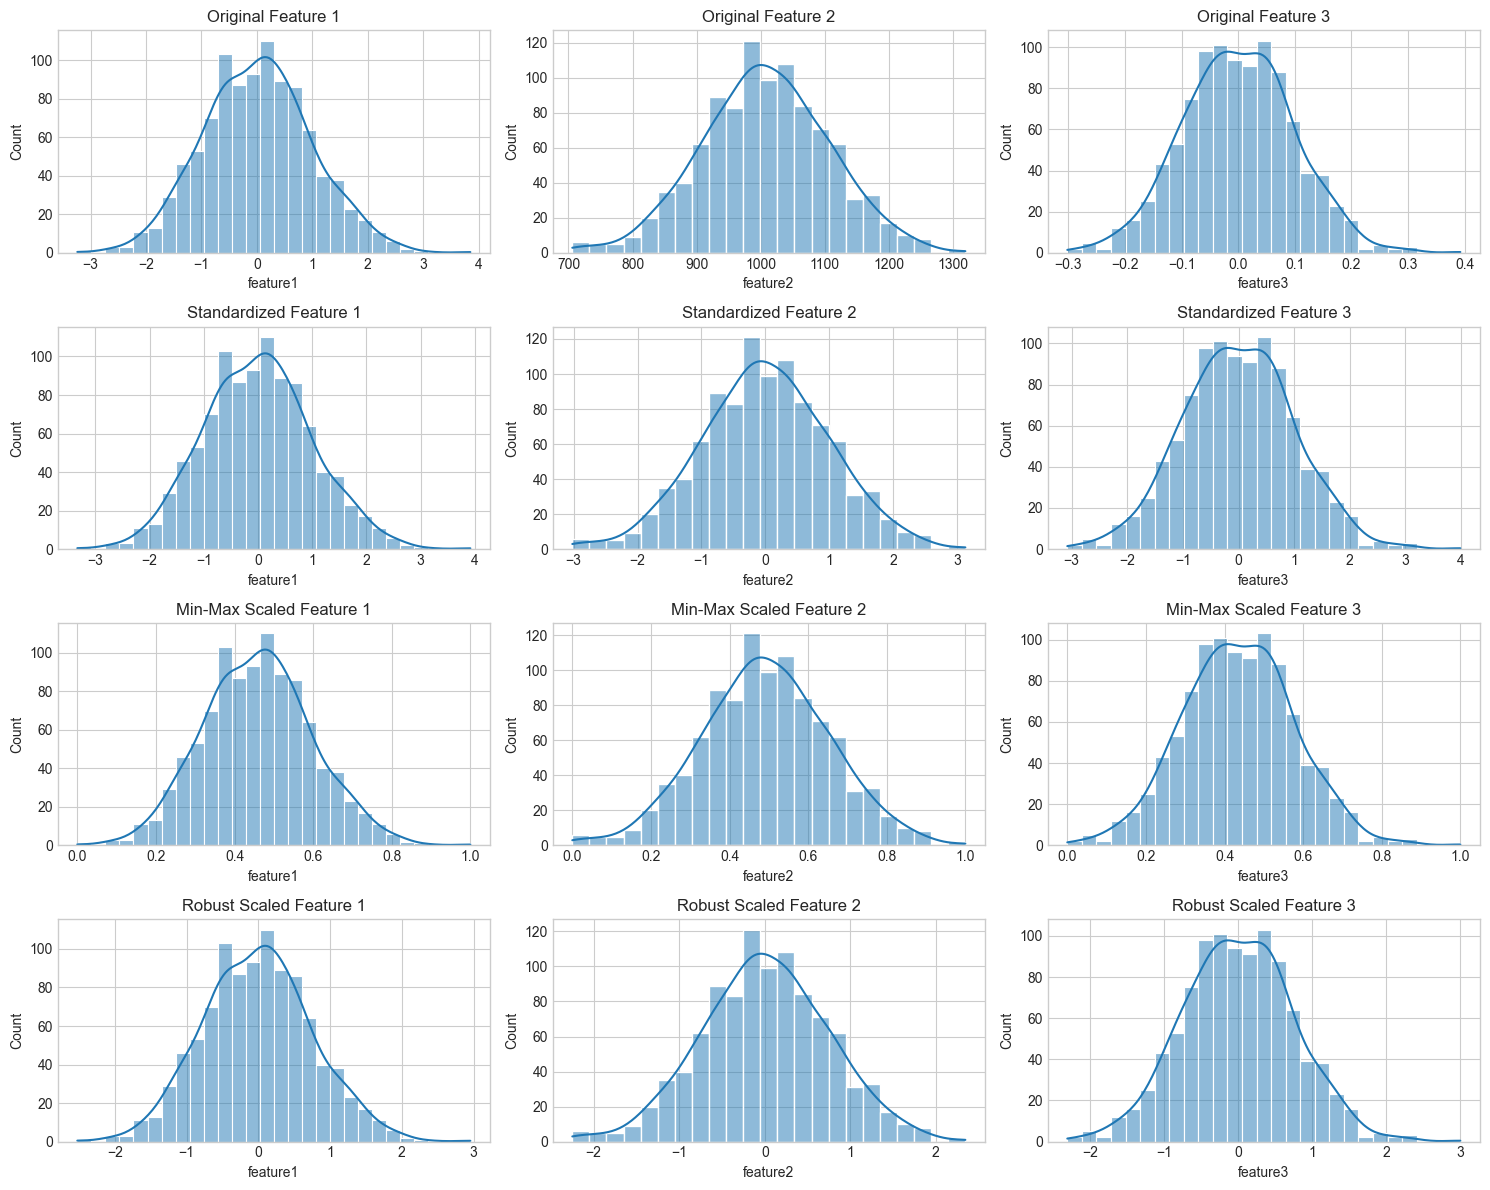

In [28]:
# Compare distributions after scaling
plt.figure(figsize=(15, 12))

# Original data
plt.subplot(4, 3, 1)
sns.histplot(data_unscaled['feature1'], kde=True)
plt.title('Original Feature 1')
plt.grid(True)

plt.subplot(4, 3, 2)
sns.histplot(data_unscaled['feature2'], kde=True)
plt.title('Original Feature 2')
plt.grid(True)

plt.subplot(4, 3, 3)
sns.histplot(data_unscaled['feature3'], kde=True)
plt.title('Original Feature 3')
plt.grid(True)

# Standard scaled data
plt.subplot(4, 3, 4)
sns.histplot(data_std_scaled['feature1'], kde=True)
plt.title('Standardized Feature 1')
plt.grid(True)

plt.subplot(4, 3, 5)
sns.histplot(data_std_scaled['feature2'], kde=True)
plt.title('Standardized Feature 2')
plt.grid(True)

plt.subplot(4, 3, 6)
sns.histplot(data_std_scaled['feature3'], kde=True)
plt.title('Standardized Feature 3')
plt.grid(True)

# Min-Max scaled data
plt.subplot(4, 3, 7)
sns.histplot(data_minmax_scaled['feature1'], kde=True)
plt.title('Min-Max Scaled Feature 1')
plt.grid(True)

plt.subplot(4, 3, 8)
sns.histplot(data_minmax_scaled['feature2'], kde=True)
plt.title('Min-Max Scaled Feature 2')
plt.grid(True)

plt.subplot(4, 3, 9)
sns.histplot(data_minmax_scaled['feature3'], kde=True)
plt.title('Min-Max Scaled Feature 3')
plt.grid(True)

# Robust scaled data
plt.subplot(4, 3, 10)
sns.histplot(data_robust_scaled['feature1'], kde=True)
plt.title('Robust Scaled Feature 1')
plt.grid(True)

plt.subplot(4, 3, 11)
sns.histplot(data_robust_scaled['feature2'], kde=True)
plt.title('Robust Scaled Feature 2')
plt.grid(True)

plt.subplot(4, 3, 12)
sns.histplot(data_robust_scaled['feature3'], kde=True)
plt.title('Robust Scaled Feature 3')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4.4 Encoding Categorical Variables

Machine learning algorithms typically require numerical input, so categorical variables need to be encoded.

In [29]:
# Create a sample dataset with categorical features
cat_data = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'green', 'blue', 'red'],
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large', 'large'],
    'material': ['wood', 'metal', 'plastic', 'wood', 'metal', 'plastic', 'metal'],
    'rating': [1, 2, 3, 4, 5, 3, 2]  # ordinal feature
})

print("Original categorical data:")
cat_data

Original categorical data:


,color,size,material,rating
0,red,small,wood,1
1,blue,medium,metal,2
2,green,large,plastic,3
3,red,medium,wood,4
4,green,small,metal,5
5,blue,large,plastic,3
6,red,large,metal,2


#### Encoding Techniques:

In [30]:
# 1. One-Hot Encoding
# Creates binary columns for each category
onehot_encoded = pd.get_dummies(cat_data[['color', 'size', 'material']])
print("One-Hot Encoded data:")
onehot_encoded

One-Hot Encoded data:


,color_blue,color_green,color_red,size_large,size_medium,size_small,material_metal,material_plastic,material_wood
0,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,0,1,0,0
2,0,1,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,1,1,0,0
5,1,0,0,1,0,0,0,1,0
6,0,0,1,1,0,0,1,0,0


In [31]:
# 2. Label Encoding
# Assigns a unique integer to each category
label_encoder = LabelEncoder()

label_encoded = cat_data.copy()
for col in ['color', 'size', 'material']:
    label_encoded[f"{col}_encoded"] = label_encoder.fit_transform(cat_data[col])

print("Label Encoded data:")
label_encoded

Label Encoded data:


,color,size,material,rating,color_encoded,size_encoded,material_encoded
0,red,small,wood,1,2,2,2
1,blue,medium,metal,2,0,1,0
2,green,large,plastic,3,1,0,1
3,red,medium,wood,4,2,1,2
4,green,small,metal,5,1,2,0
5,blue,large,plastic,3,0,0,1
6,red,large,metal,2,2,0,0


In [32]:
# 3. Ordinal Encoding
# Like label encoding but preserves order for ordinal variables
# Define the order of categories
size_order = ['small', 'medium', 'large']
rating_order = [1, 2, 3, 4, 5]

ordinal_encoder = OrdinalEncoder(categories=[size_order])
size_encoded = ordinal_encoder.fit_transform(cat_data[['size']])

ordinal_encoded = cat_data.copy()
ordinal_encoded['size_ordinal'] = size_encoded

print("Ordinal Encoded data:")
ordinal_encoded

Ordinal Encoded data:


,color,size,material,rating,size_ordinal
0,red,small,wood,1,0.0
1,blue,medium,metal,2,1.0
2,green,large,plastic,3,2.0
3,red,medium,wood,4,1.0
4,green,small,metal,5,0.0
5,blue,large,plastic,3,2.0
6,red,large,metal,2,2.0


### 4.5 Feature Engineering and Selection

Feature engineering is the process of creating new features from existing ones, while feature selection involves choosing the most relevant features for modeling.

In [33]:
# Use the Iris dataset for feature engineering and selection
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("Original Iris features:")
X.head()

Original Iris features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Feature Engineering Examples:

In [34]:
# 1. Creating new features
X_engineered = X.copy()

# Ratio features
X_engineered['sepal_ratio'] = X['sepal length (cm)'] / X['sepal width (cm)']
X_engineered['petal_ratio'] = X['petal length (cm)'] / X['petal width (cm)']

# Area features
X_engineered['sepal_area'] = X['sepal length (cm)'] * X['sepal width (cm)']
X_engineered['petal_area'] = X['petal length (cm)'] * X['petal width (cm)']

print("Engineered features:")
X_engineered.head()

Engineered features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_ratio,petal_ratio,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,1.457143,7.0,17.85,0.28
1,4.9,3.0,1.4,0.2,1.633333,7.0,14.70,0.28
2,4.7,3.2,1.3,0.2,1.468750,6.5,15.04,0.26
3,4.6,3.1,1.5,0.2,1.483871,7.5,14.26,0.30
4,5.0,3.6,1.4,0.2,1.388889,7.0,18.00,0.28


In [35]:
# 2. Polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(X.columns)

X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

print(f"Original shape: {X.shape}")
print(f"After polynomial transformation: {X_poly_df.shape}")
print("\nFirst few polynomial features:")
X_poly_df.iloc[:, :10].head()  # Show only first 10 columns for brevity

Original shape: (150, 4)
After polynomial transformation: (150, 14)

First few polynomial features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length (cm)^2,sepal length (cm) sepal width (cm),sepal length (cm) petal length (cm),sepal length (cm) petal width (cm),sepal width (cm)^2,sepal width (cm) petal length (cm)
0,5.1,3.5,1.4,0.2,26.01,17.85,7.14,1.02,12.25,4.90
1,4.9,3.0,1.4,0.2,24.01,14.70,6.86,0.98,9.00,4.20
2,4.7,3.2,1.3,0.2,22.09,15.04,6.11,0.94,10.24,4.16
3,4.6,3.1,1.5,0.2,21.16,14.26,6.90,0.92,9.61,4.65
4,5.0,3.6,1.4,0.2,25.00,18.00,7.00,1.00,12.96,5.04


#### Feature Selection Techniques:

In [36]:
# 1. Filter method: SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Features selected by SelectKBest:")
print(selected_features)

# Get feature scores
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values(by='Score', ascending=False)

print("\nFeature scores:")
scores

Features selected by SelectKBest:
Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

Feature scores:


,Feature,Score,P-value
2,petal length (cm),1180.161182,2.856777e-91
3,petal width (cm),960.007147,4.169446e-85
0,sepal length (cm),119.264502,1.669669e-31
1,sepal width (cm),49.160040,4.492017e-17


In [37]:
# 2. Wrapper method: Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

# Get selected features
selected_rfe = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("Features selected by RFE:")
selected_rfe

Features selected by RFE:


,Feature,Selected,Ranking
1,sepal width (cm),True,1
2,petal length (cm),True,1
3,petal width (cm),True,1
0,sepal length (cm),False,2


In [38]:
# 3. Embedded method: L1 regularization (Lasso)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Using L1 regularization for feature selection
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000)
sfm = SelectFromModel(lasso)
sfm.fit(X, y)

# Get selected features
selected_l1 = pd.DataFrame({
    'Feature': X.columns,
    'Selected': sfm.get_support()
})

print("Features selected by L1 regularization:")
selected_l1

Features selected by L1 regularization:


,Feature,Selected
0,sepal length (cm),True
1,sepal width (cm),True
2,petal length (cm),True
3,petal width (cm),False


### 4.6 Creating a Preprocessing Pipeline

Pipelines in scikit-learn allow you to chain multiple preprocessing steps and a model into a single object.

In [39]:
# Create a sample dataset with mixed data types
np.random.seed(42)
n_samples = 1000

mixed_data = pd.DataFrame({
    'age': np.random.randint(18, 90, n_samples),
    'income': np.random.randn(n_samples) * 20000 + 50000,
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_samples)
})

# Introduce missing values
for col in mixed_data.columns:
    mask = np.random.choice([True, False], mixed_data.shape[0], p=[0.05, 0.95])
    mixed_data.loc[mask, col] = np.nan
    
# Create a target variable (binary classification)
mixed_data['income'] = mixed_data['income'].fillna(mixed_data['income'].median())
mixed_data['target'] = (mixed_data['income'] > 50000).astype(int)

print("Mixed data sample:")
mixed_data.head()

Mixed data sample:


,age,income,education,region,target
0,69.0,44863.659441,Bachelor,North,0
1,32.0,70485.731636,Bachelor,North,1
2,89.0,17549.527396,Master,South,0
3,78.0,56819.767046,High School,NaN,1
4,38.0,50511.426728,Master,South,1


In [40]:
# Check data types and missing values
print("Data types:")
print(mixed_data.dtypes)

print("\nMissing values:")
print(mixed_data.isnull().sum())

Data types:
age          float64
income       float64
education     object
region        object
target         int32
dtype: object

Missing values:
age          53
income        0
education    57
region       56
target        0
dtype: int64


In [41]:
# Define features and target
X = mixed_data.drop('target', axis=1)
y = mixed_data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (800, 4)
Testing set shape: (200, 4)


In [42]:
# Create a preprocessing pipeline
# Define column types
numerical_cols = ['age', 'income']
categorical_cols = ['education', 'region']

# Define preprocessing for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create full pipeline including model
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the pipeline
full_pipeline.fit(X_train, y_train)

# Evaluate on test set
accuracy = full_pipeline.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9850


## 5. Data Quality Assessments

Data quality is crucial for building reliable models. Let's explore some methods to assess and ensure data quality.

In [43]:
# Create a function to assess data quality
def assess_data_quality(df):
    print(f"{'='*50}")
    print(f"Data Quality Assessment")
    print(f"{'='*50}")
    
    # Basic information
    print(f"Dataset shape: {df.shape}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    
    # Data types
    print("\nData Types:")
    print(df.dtypes)
    
    # Missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': missing_percentage
    })
    
    print("\nMissing Values:")
    print(missing_df[missing_df['Missing Values'] > 0])
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    # Statistical summary for numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numerical_cols) > 0:
        print("\nNumerical Features Summary:")
        print(df[numerical_cols].describe())
        
        # Check for potential outliers
        print("\nPotential Outliers (using IQR method):")
        for col in numerical_cols:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            if len(outliers) > 0:
                print(f"  - {col}: {len(outliers)} potential outliers ({len(outliers)/len(df)*100:.2f}%)")
    
    # Categorical columns summary
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("\nCategorical Features Summary:")
        for col in categorical_cols:
            unique_values = df[col].nunique()
            print(f"  - {col}: {unique_values} unique values")
            # Show top 5 most common values
            top_values = df[col].value_counts().head(5)
            print(f"    Top values: {top_values.to_dict()}")
    
    return

In [44]:
# Apply quality assessment to a mixed dataset
assess_data_quality(mixed_data)

Data Quality Assessment
Dataset shape: (1000, 5)
Number of rows: 1000
Number of columns: 5

Data Types:
age          float64
income       float64
education     object
region        object
target         int32
dtype: object

Missing Values:
           Missing Values  Percentage (%)
age                    53             5.3
education              57             5.7
region                 56             5.6

Duplicate rows: 1 (0.10%)

Numerical Features Summary:
              age         income
count  947.000000    1000.000000
mean    52.740232   51497.223915
std     21.050631   19925.111290
min     18.000000  -17032.210338
25%     34.000000   38615.295998
50%     52.000000   51593.157151
75%     71.000000   64684.968931
max     89.000000  113347.433441

Potential Outliers (using IQR method):
  - income: 8 potential outliers (0.80%)

Categorical Features Summary:
  - education: 4 unique values
    Top values: {'High School': 253, 'Master': 251, 'PhD': 232, 'Bachelor': 207}
  - region: 4 u

## 6. Data Visualization Techniques

Data visualization is essential for understanding data patterns and communicating insights.

In [45]:
# Use the Iris dataset for visualization examples
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

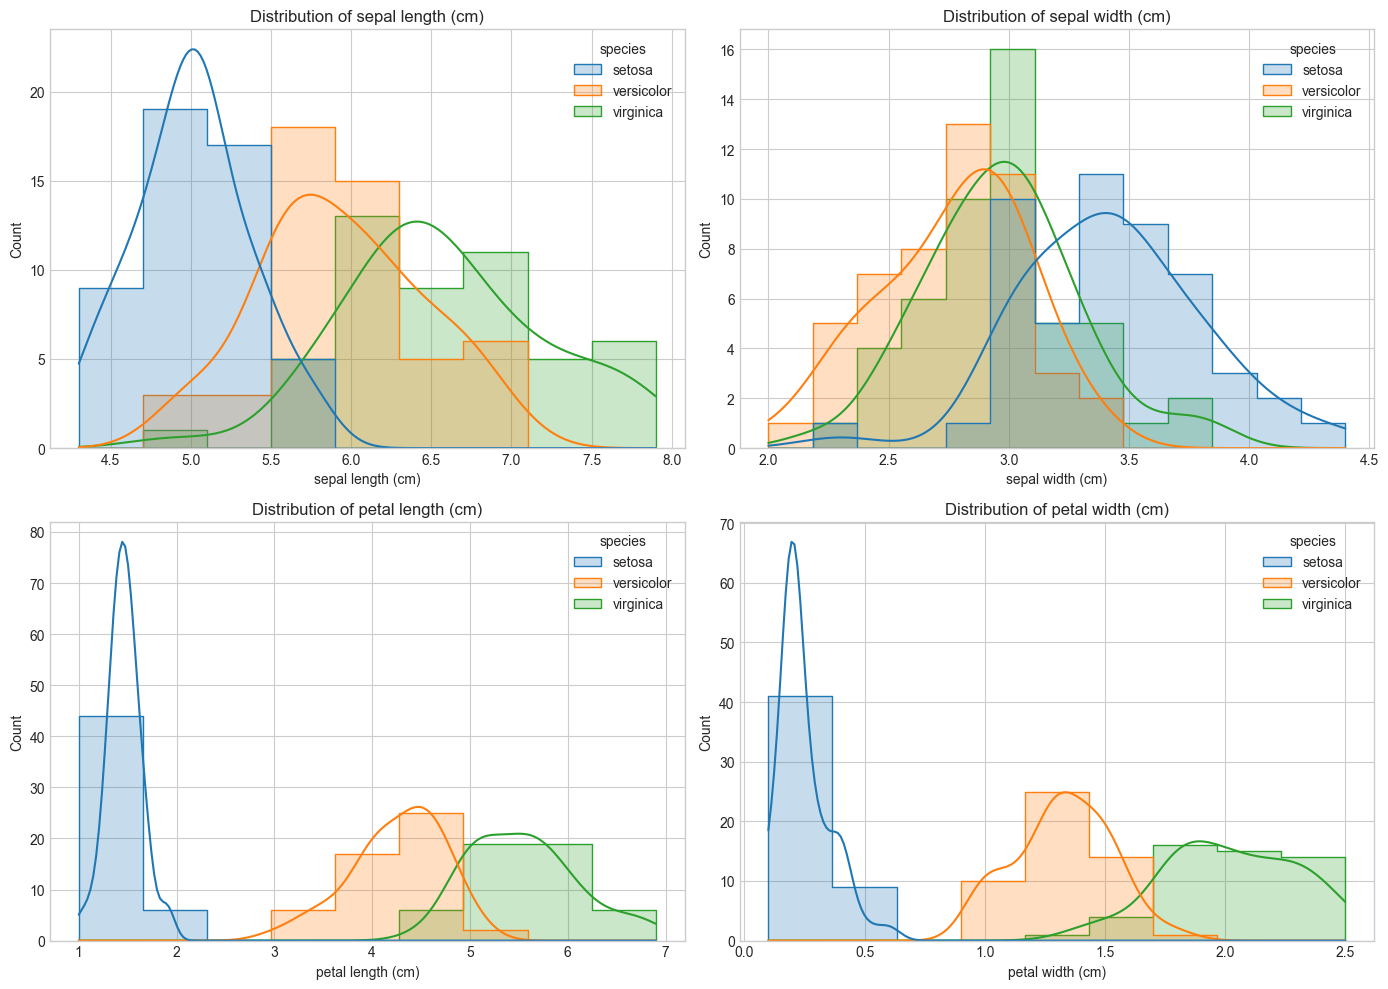

In [46]:
# 1. Distribution plots
plt.figure(figsize=(14, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris_df, x=feature, hue='species', kde=True, element='step', common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.grid(True)

plt.tight_layout()
plt.show()

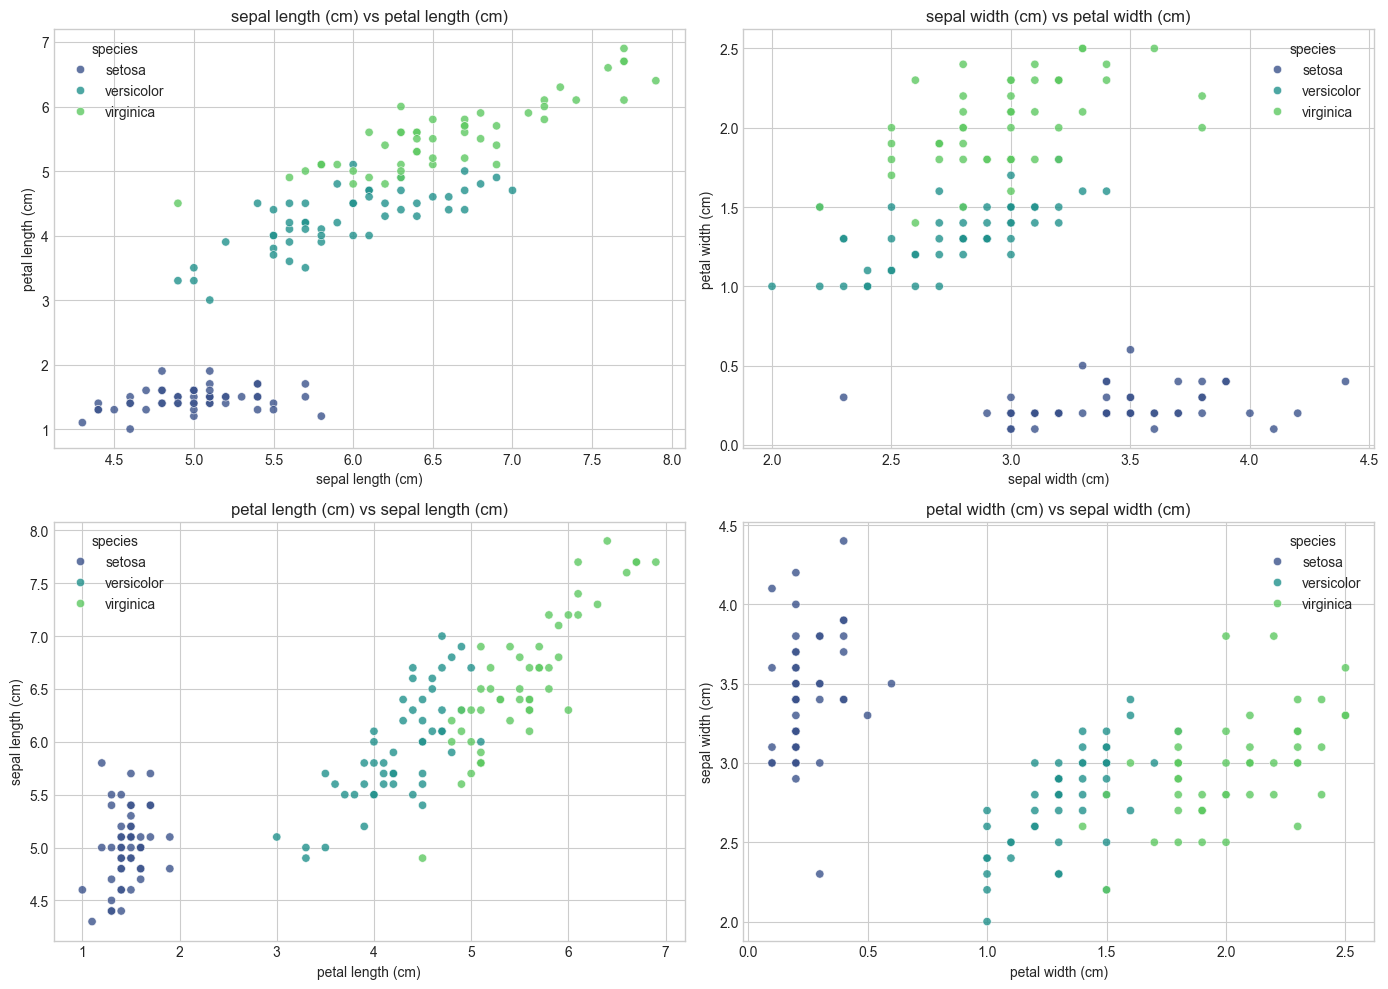

In [47]:
# 2. Scatter plots
plt.figure(figsize=(14, 10))

# Plot all pairs of features
for i in range(2):
    for j in range(2):
        plt.subplot(2, 2, i*2 + j + 1)
        sns.scatterplot(data=iris_df, x=iris.feature_names[i*2+j], y=iris.feature_names[(i*2+j+2) % 4], 
                       hue='species', palette='viridis', alpha=0.8)
        plt.title(f'{iris.feature_names[i*2+j]} vs {iris.feature_names[(i*2+j+2) % 4]}')
        plt.grid(True)

plt.tight_layout()
plt.show()

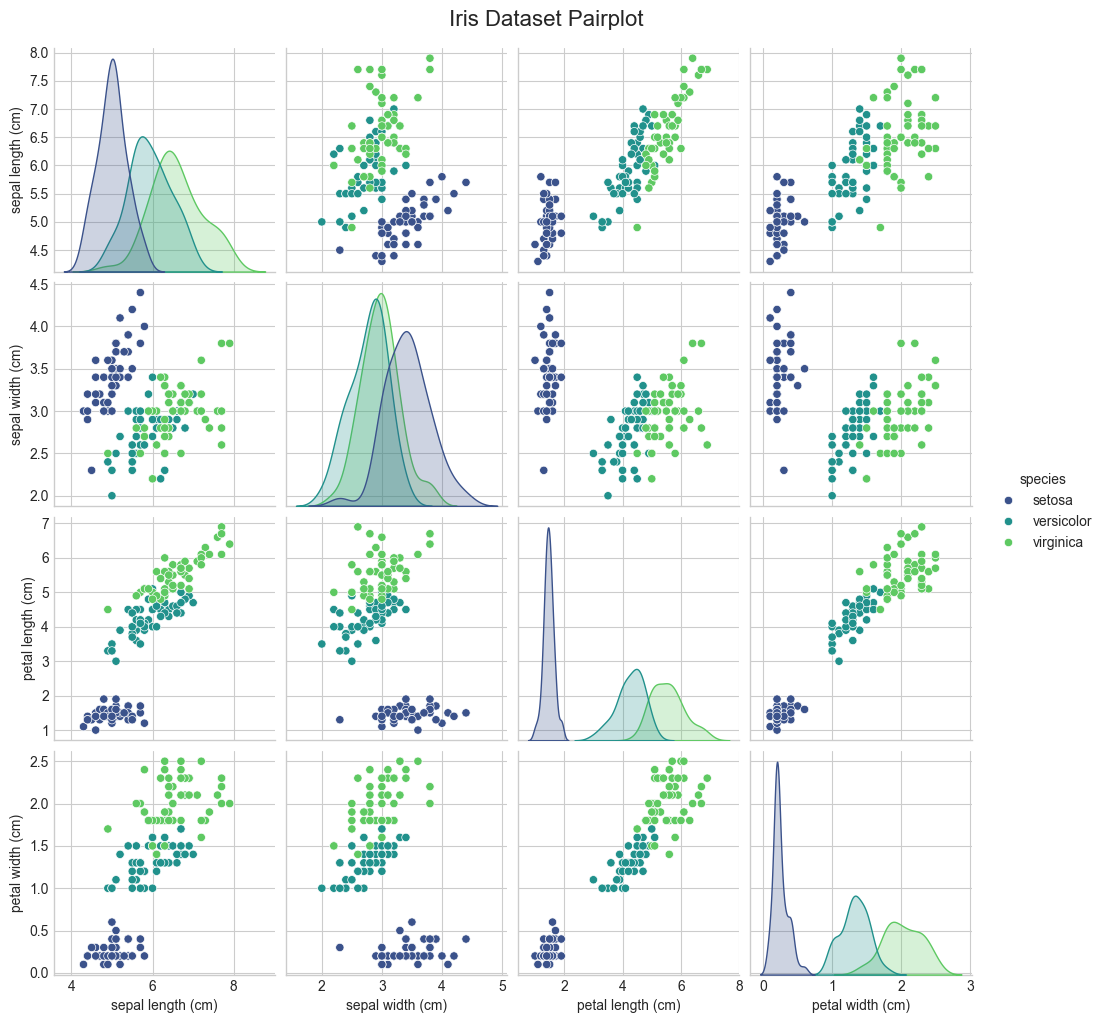

In [48]:
# 3. Pair plot - shows all pairwise combinations
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle('Iris Dataset Pairplot', y=1.02, fontsize=16)
plt.show()

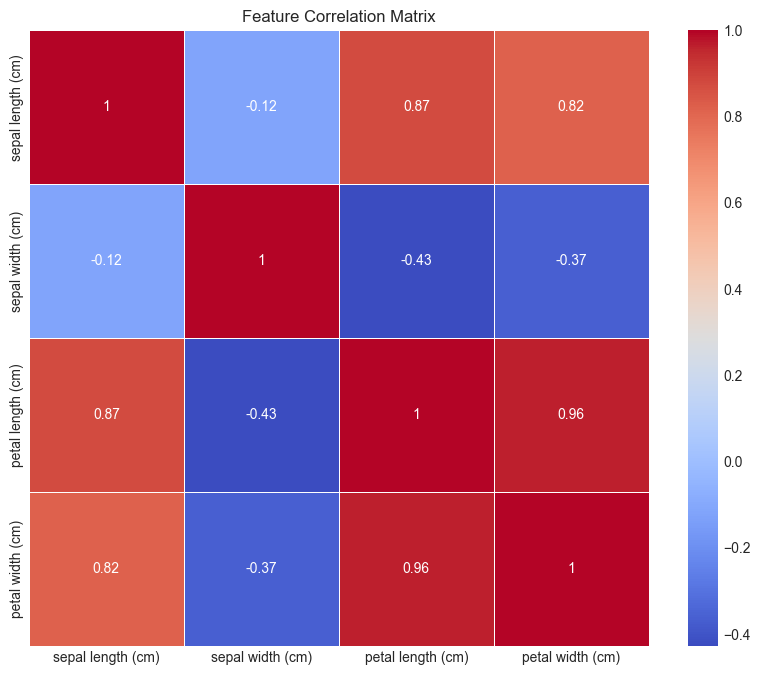

In [49]:
# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = iris_df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

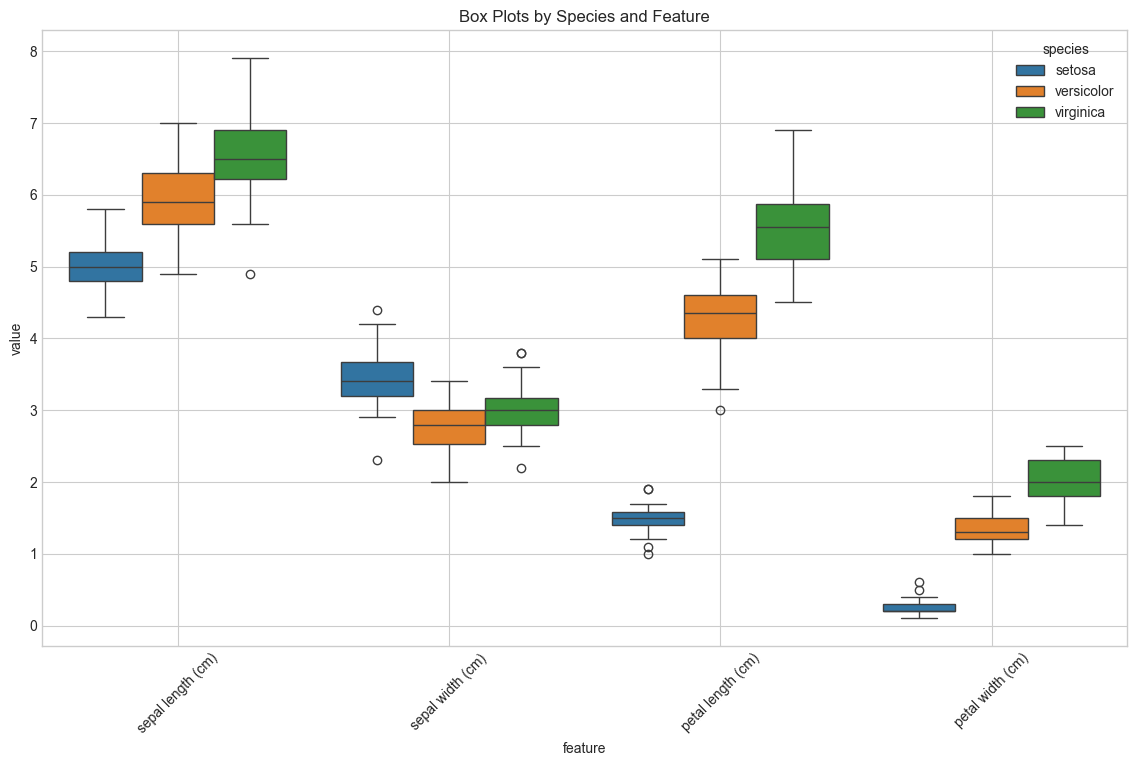

In [50]:
# 5. Box plots - good for spotting outliers and distributions
plt.figure(figsize=(14, 8))

# Melt the dataframe to make plotting easier
iris_melted = pd.melt(iris_df, id_vars=['species'], value_vars=iris.feature_names, 
                     var_name='feature', value_name='value')

sns.boxplot(x='feature', y='value', hue='species', data=iris_melted)
plt.title('Box Plots by Species and Feature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

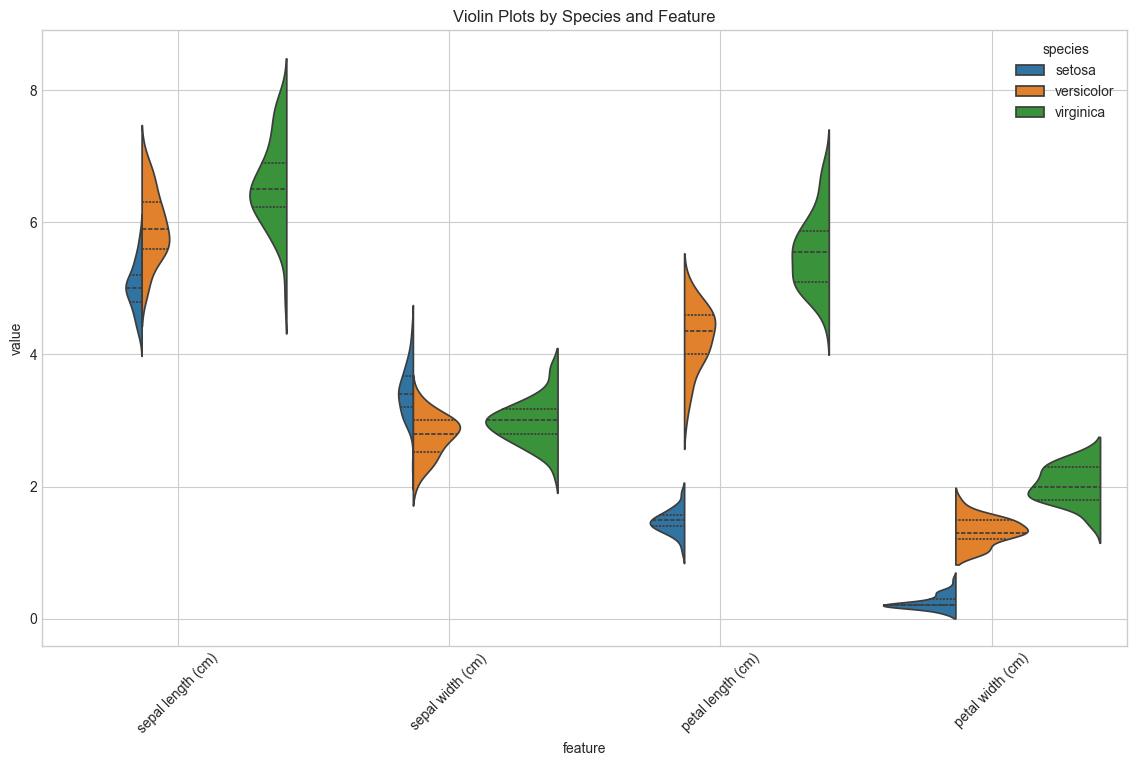

In [51]:
# 6. Violin plots - show distribution density
plt.figure(figsize=(14, 8))
sns.violinplot(x='feature', y='value', hue='species', data=iris_melted, split=True, inner='quart')
plt.title('Violin Plots by Species and Feature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

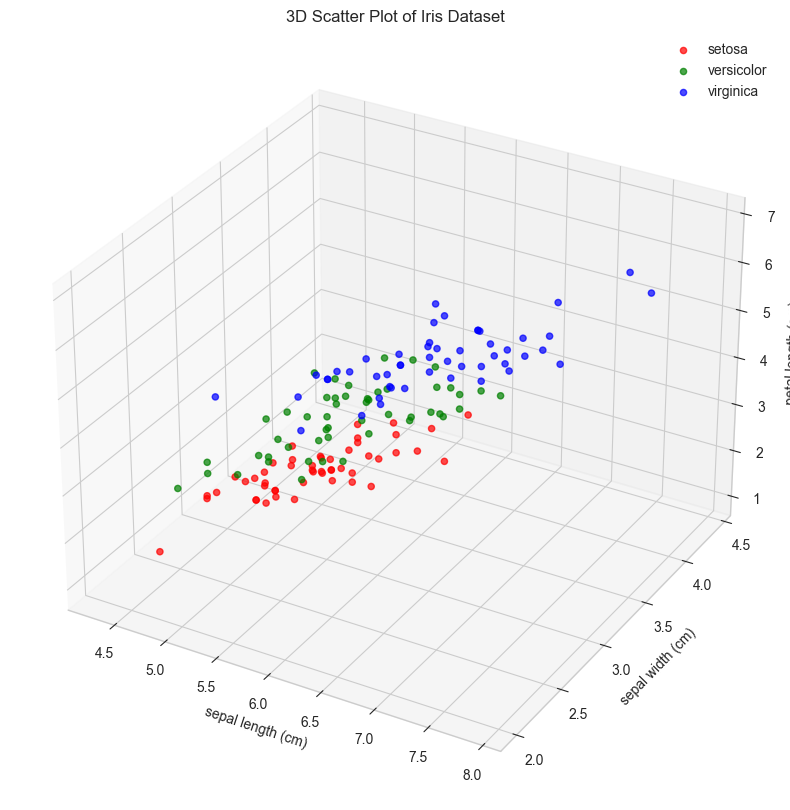

In [52]:
# 7. 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Choose three features to visualize
features = [iris.feature_names[0], iris.feature_names[1], iris.feature_names[2]]
colors = ['r', 'g', 'b']

# Plot each species
for species_idx, species_name in enumerate(iris.target_names):
    # Get indices for this species
    indices = iris.target == species_idx
    
    # Plot 3D scatter
    ax.scatter(
        iris.data[indices, 0],
        iris.data[indices, 1],
        iris.data[indices, 2],
        c=colors[species_idx],
        label=species_name,
        alpha=0.7
    )

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.legend()
plt.show()

## 7. Data Splitting Strategies

Proper data splitting is crucial for model evaluation. Let's explore different methods for splitting data into training, validation, and test sets.

In [53]:
# Use the breast cancer dataset for splitting examples
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 30)
Class distribution: [212 357]


In [54]:
# 1. Simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Simple Train-Test Split:")
print(f"Training set: {X_train.shape}, {np.bincount(y_train)}")
print(f"Test set: {X_test.shape}, {np.bincount(y_test)}")

Simple Train-Test Split:
Training set: (455, 30), [169 286]
Test set: (114, 30), [43 71]


In [55]:
# 2. Train-validation-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

print("Train-Validation-Test Split:")
print(f"Training set: {X_train.shape}, {np.bincount(y_train)}")
print(f"Validation set: {X_val.shape}, {np.bincount(y_val)}")
print(f"Test set: {X_test.shape}, {np.bincount(y_test)}")

Train-Validation-Test Split:
Training set: (341, 30), [125 216]
Validation set: (114, 30), [44 70]
Test set: (114, 30), [43 71]


In [56]:
# 3. Stratified split (preserves class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Stratified Train-Test Split:")
print(f"Original class distribution: {np.bincount(y) / len(y)}")
print(f"Training set distribution: {np.bincount(y_train) / len(y_train)}")
print(f"Test set distribution: {np.bincount(y_test) / len(y_test)}")

Stratified Train-Test Split:
Original class distribution: [0.37258348 0.62741652]
Training set distribution: [0.37362637 0.62637363]
Test set distribution: [0.36842105 0.63157895]


In [57]:
# 4. Cross-validation splits
from sklearn.model_selection import KFold, StratifiedKFold

# Regular k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("K-Fold Cross-Validation Splits:")
for i, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {i+1}:")
    print(f"  Training: {len(train_idx)} samples")
    print(f"  Validation: {len(val_idx)} samples")
    
print("\nStratified K-Fold Cross-Validation Splits:")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {i+1}:")
    print(f"  Training: {len(train_idx)} samples, class distribution: {np.bincount(y[train_idx])}")
    print(f"  Validation: {len(val_idx)} samples, class distribution: {np.bincount(y[val_idx])}")

K-Fold Cross-Validation Splits:
Fold 1:
  Training: 455 samples
  Validation: 114 samples
Fold 2:
  Training: 455 samples
  Validation: 114 samples
Fold 3:
  Training: 455 samples
  Validation: 114 samples
Fold 4:
  Training: 455 samples
  Validation: 114 samples
Fold 5:
  Training: 456 samples
  Validation: 113 samples

Stratified K-Fold Cross-Validation Splits:
Fold 1:
  Training: 455 samples, class distribution: [169 286]
  Validation: 114 samples, class distribution: [43 71]
Fold 2:
  Training: 455 samples, class distribution: [169 286]
  Validation: 114 samples, class distribution: [43 71]
Fold 3:
  Training: 455 samples, class distribution: [170 285]
  Validation: 114 samples, class distribution: [42 72]
Fold 4:
  Training: 455 samples, class distribution: [170 285]
  Validation: 114 samples, class distribution: [42 72]
Fold 5:
  Training: 456 samples, class distribution: [170 286]
  Validation: 113 samples, class distribution: [42 71]


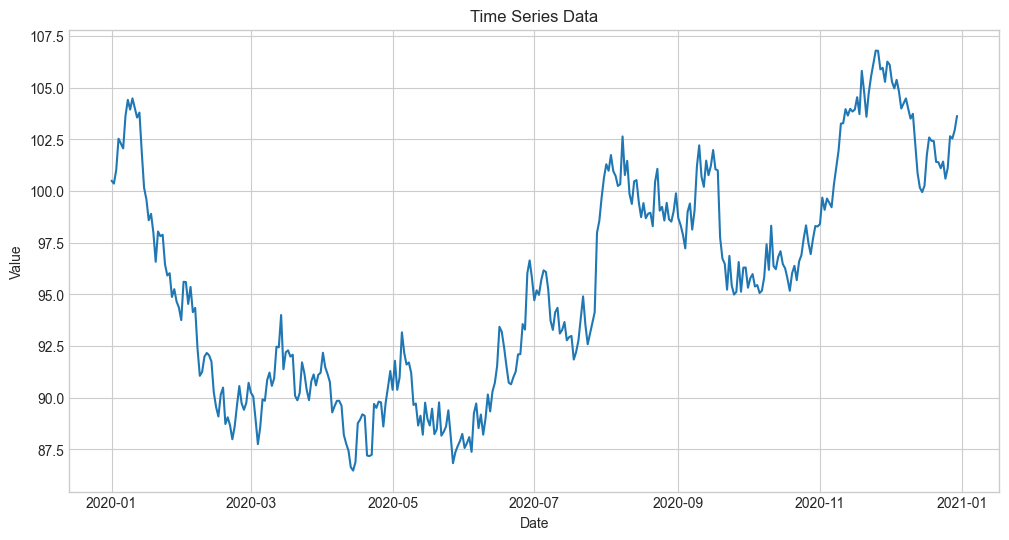

Time-based Split:
Training period: 2020-01-01 00:00:00 to 2020-09-11 00:00:00, 255 samples
Validation period: 2020-09-12 00:00:00 to 2020-11-04 00:00:00, 54 samples
Test period: 2020-11-05 00:00:00 to 2020-12-30 00:00:00, 56 samples


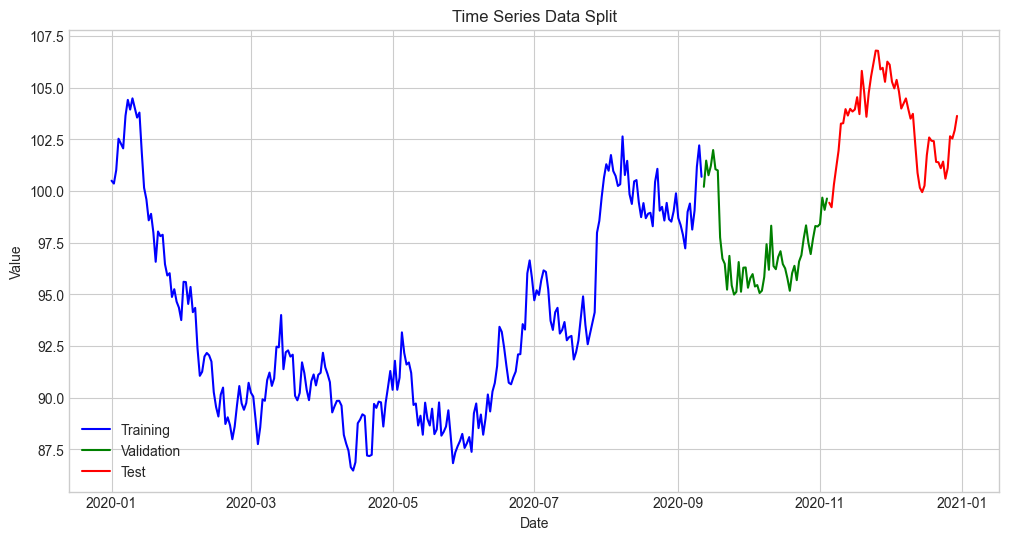

In [58]:
# 5. Time-based split (for time series data)
# Generate a simple time series dataset
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=365, freq='D')
values = np.cumsum(np.random.randn(365)) + 100  # Random walk with drift

time_series_df = pd.DataFrame({
    'date': dates,
    'value': values
})

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['date'], time_series_df['value'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Time-based split
train_size = int(len(time_series_df) * 0.7)
val_size = int(len(time_series_df) * 0.15)

train_data = time_series_df.iloc[:train_size]
val_data = time_series_df.iloc[train_size:train_size+val_size]
test_data = time_series_df.iloc[train_size+val_size:]

print("Time-based Split:")
print(f"Training period: {train_data['date'].min()} to {train_data['date'].max()}, {len(train_data)} samples")
print(f"Validation period: {val_data['date'].min()} to {val_data['date'].max()}, {len(val_data)} samples")
print(f"Test period: {test_data['date'].min()} to {test_data['date'].max()}, {len(test_data)} samples")

# Visualize the split
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['value'], 'b-', label='Training')
plt.plot(val_data['date'], val_data['value'], 'g-', label='Validation')
plt.plot(test_data['date'], test_data['value'], 'r-', label='Test')
plt.title('Time Series Data Split')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## 8. Chapter Summary

In this chapter, we covered the fundamentals of data in data science:

1. **Types of Data**: Structured, unstructured, numerical, categorical, time series, etc.

2. **Data Collection and Sources**: Primary, secondary, APIs, web scraping, etc.

3. **Exploratory Data Analysis**: Techniques to understand and summarize datasets.

4. **Data Preprocessing Techniques**:
   - Handling missing values with removal, imputation, etc.
   - Detecting and handling outliers using z-scores, IQR, etc.
   - Scaling features with standardization, min-max scaling, etc.
   - Encoding categorical variables with one-hot, label, and ordinal encoding.
   - Feature engineering and selection to improve model performance.
   - Creating preprocessing pipelines for reproducible workflows.

5. **Data Quality Assessment**: Methods to evaluate and ensure data quality.

6. **Data Visualization**: Techniques to visually explore and communicate data insights.

7. **Data Splitting Strategies**: Methods to divide data into training, validation, and test sets.

These concepts and techniques form the foundation for all machine learning tasks. Proper understanding and application of these principles are crucial for building effective models.

## 9. Next Steps

In the upcoming chapters, we'll apply these data concepts to build various machine learning models, including:

1. Linear and logistic regression
2. Decision trees and random forests
3. Support vector machines
4. K-nearest neighbors
5. Bayesian classifiers
6. Clustering algorithms
7. Neural networks and deep learning models

Each algorithm will be implemented with proper preprocessing, evaluation, and interpretation.